In [252]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [254]:
len(words)

32033

In [255]:
chars = sorted(list(set(''.join(words))))
stoi = {ch:i+1 for i,ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:ch for ch,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [256]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

print(X.shape, Y.shape, X.dtype, Y.dtype)

torch.Size([228146, 3]) torch.Size([228146]) torch.int64 torch.int64


In [389]:
block_size = 4

def build_dataset(words):

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

# X, Y = build_dataset(words)
# print(X.shape, Y.shape, X.dtype, Y.dtype)
print(Xtr.shape, Ytr.shape, Xtr.dtype, Ytr.dtype)
print(Xval.shape, Yval.shape, Xval.dtype, Yval.dtype)
print(Xtest.shape, Ytest.shape, Xtest.dtype, Ytest.dtype)


torch.Size([182441, 4]) torch.Size([182441]) torch.int64 torch.int64
torch.Size([22902, 4]) torch.Size([22902]) torch.int64 torch.int64
torch.Size([22803, 4]) torch.Size([22803]) torch.int64 torch.int64


In [257]:
C = torch.randn((27, 2)) # 27 characters, 2 features
print(C[5])

five_as_one_hot = F.one_hot(torch.tensor(5), num_classes=27).float()
print(five_as_one_hot @ C)

tensor([-0.3937, -1.7671])
tensor([-0.3937, -1.7671])


In [258]:
print(C[[5,6,7]])
print(C[torch.tensor([5,6,7])])
C[X].shape

X[13,2]
print(C[X[13,2]])
print(C[1])

tensor([[-0.3937, -1.7671],
        [-0.4762, -0.6393],
        [-0.4263,  0.1923]])
tensor([[-0.3937, -1.7671],
        [-0.4762, -0.6393],
        [-0.4263,  0.1923]])
tensor([-0.0731, -0.4355])
tensor([-0.0731, -0.4355])


In [ ]:
# This is our embedding layer.
emb = C[X]
print(emb.shape)

torch.Size([228146, 3, 2])


In [260]:
# First hidden layer.
W1 = torch.randn(6, 100)
b1 = torch.randn(100)



In [455]:
sample_embeddings = []
for i in range(block_size):
    sample_embedding = emb[:, i, :]
    # print(sample_embedding.shape)
    sample_embeddings.append(emb[:, i, :])

# print(len(sample_embeddings))
print(sample_embeddings[0].shape)
print(emb.shape)
print(emb[:, 0, :].shape)
    
print(sample_embeddings[0].shape)

torch.cat(sample_embeddings, dim=1).shape

torch.Size([1, 15])
torch.Size([1, 4, 15])
torch.Size([1, 15])
torch.Size([1, 15])


torch.Size([1, 60])

In [262]:
unbound = torch.unbind(emb, dim=1)
type(unbound[2])
len(unbound)

for i in range(len(unbound)):
    print(unbound[i].shape)

catted_embeddings_per_sample = torch.cat(unbound, dim=1)







torch.Size([228146, 2])
torch.Size([228146, 2])
torch.Size([228146, 2])


In [263]:
T = torch.arange(18)
T.view(3, 1, 6).storage()

len(emb.storage())
stacked_emb = emb.view(-1, 6)
print(stacked_emb)
print(catted_embeddings_per_sample)
stacked_emb == catted_embeddings_per_sample



tensor([[-0.1166, -1.5546, -0.1166, -1.5546, -0.1166, -1.5546],
        [-0.1166, -1.5546, -0.1166, -1.5546, -0.3937, -1.7671],
        [-0.1166, -1.5546, -0.3937, -1.7671,  0.5850,  0.1628],
        ...,
        [-0.2593, -0.4481, -0.2593, -0.4481, -1.9985,  0.1625],
        [-0.2593, -0.4481, -1.9985,  0.1625, -0.2593, -0.4481],
        [-1.9985,  0.1625, -0.2593, -0.4481, -0.3109, -2.1350]])
tensor([[-0.1166, -1.5546, -0.1166, -1.5546, -0.1166, -1.5546],
        [-0.1166, -1.5546, -0.1166, -1.5546, -0.3937, -1.7671],
        [-0.1166, -1.5546, -0.3937, -1.7671,  0.5850,  0.1628],
        ...,
        [-0.2593, -0.4481, -0.2593, -0.4481, -1.9985,  0.1625],
        [-0.2593, -0.4481, -1.9985,  0.1625, -0.2593, -0.4481],
        [-1.9985,  0.1625, -0.2593, -0.4481, -0.3109, -2.1350]])


tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [264]:
print(W1.shape)
print(b1.shape)
print(stacked_emb.shape)

h = (stacked_emb @ W1 + b1).tanh()
print(h.shape)

torch.Size([6, 100])
torch.Size([100])
torch.Size([228146, 6])
torch.Size([228146, 100])


In [265]:
(stacked_emb @ W1).shape
b1.shape

torch.Size([100])

In [266]:
# Finally, the output layer.
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [267]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

probs.shape

# For each sample, get the probability of the correct character.
# This works because the output layer consists of as many neurons as there are characters,
# and the neurons are arranged in the same order as the characters in the vocabulary,
# so for each sample, we simply look up the probability of the correct character.
actual_probs = probs[torch.arange(X.shape[0]), Y]
loss = -actual_probs.log().mean()


In [390]:
# Inputs, S x B, S is the block size, B is the block size.
Xtr.shape
# Outputs, which is the same as the # of samples.
Ytr.shape






torch.Size([182441])

In [391]:
g = torch.Generator().manual_seed(2147483647)
# Randomly initialize the vector embeddings.
features = 15 
block_size = 4
C = torch.randn((27, features), generator=g)
# Hidden layer.
num_neurons = 300
W1 = torch.randn((features * block_size, num_neurons), generator=g)
b1 = torch.randn(num_neurons, generator=g)
# Output layer.
W2 = torch.randn((num_neurons, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [380]:
sum(p.nelement() for p in parameters)

26832

In [341]:
# Sample embeddings
emb = C[X] 
# Forward pass, hidden layer.
h = emb.view(-1, features * block_size) @ W1 + b1
h = h.tanh()
# Forward pass, output layer.
logits = h @ W2 + b2
counts = logits.exp()
# Normalize (softmax) the logits.
probs = counts / counts.sum(1, keepdim=True)
# Evaluate model quality based on actual probabilities and outcome.
# Get NLL loss.
loss = -probs[torch.arange(X.shape[0]), Y].log().mean()
print(loss)


tensor(19.5052)


In [342]:

# Does the same thing as the above (softmax and NLL loss).
loss = F.cross_entropy(logits, Y)
loss

tensor(19.5052)

In [393]:
for p in parameters:
    p.requires_grad = True

In [344]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri = []
lossi = []
stepi = []

for i in range(200000):
    batch_size = 128 
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))

    # Forward pass with native PyTorch.
    emb = C[Xtr[ix]]
    h = emb.view(batch_size, features * block_size) @ W1 + b1
    h = h.tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # Backward pass.
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update parameters.
    # lr = lrs[i]
    if i < 100000:
        lr = 1e-1
    else:
        lr = 1e-2
    for p in parameters:
        p.data -= lr * p.grad
        
    # Track lr, loss, and steps.
    # lri.append(lre[i])
    lossi.append(loss.item())
    stepi.append(i)
    
# print(loss.item())

In [430]:
Xtr.shape
ix = torch.randint(0, Xtr.shape[0], (batch_size,))
ix.shape
C.shape
Xtr[ix].shape
emb = C[Xtr[ix]]
emb.shape
h = emb.view(batch_size, block_size * features)
h.shape
h = h @ W1 + b1
h.shape
h = h.tanh()
h.shape
logits = h @ W2 + b2
logits.shape
loss = F.cross_entropy(logits, Ytr[ix])
loss

tensor(1.9096, grad_fn=<NllLossBackward0>)

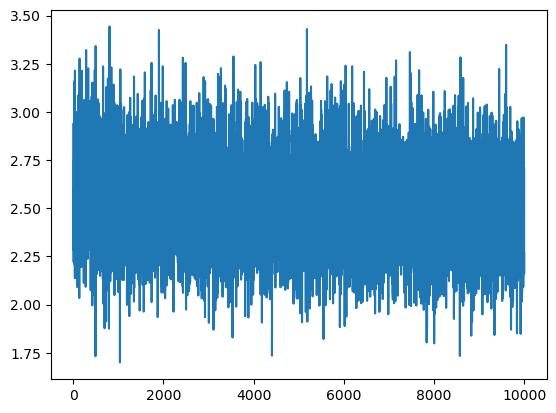

In [373]:
# plt.plot(lri, lossi)
plt.plot(stepi, lossi)

In [418]:
logits.shape
# logits.max(dim=1)

torch.Size([1, 27])

In [276]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [457]:
indices = torch.randint(0, X.shape[0], (32,))
print(X[indices].shape)
print(C[X[indices]].shape)
print(C.shape)
print(X.shape)





torch.Size([32, 3])
torch.Size([32, 3, 15])
torch.Size([27, 15])
torch.Size([228146, 3])


In [396]:
emb = C[Xtr]
h = emb.view(-1, features * block_size) @ W1 + b1
h = h.tanh()
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss






tensor(2.0475, grad_fn=<NllLossBackward0>)

In [397]:
emb = C[Xval]
h = emb.view(-1, features * block_size) @ W1 + b1
h = h.tanh()
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yval)
loss






tensor(2.1394, grad_fn=<NllLossBackward0>)

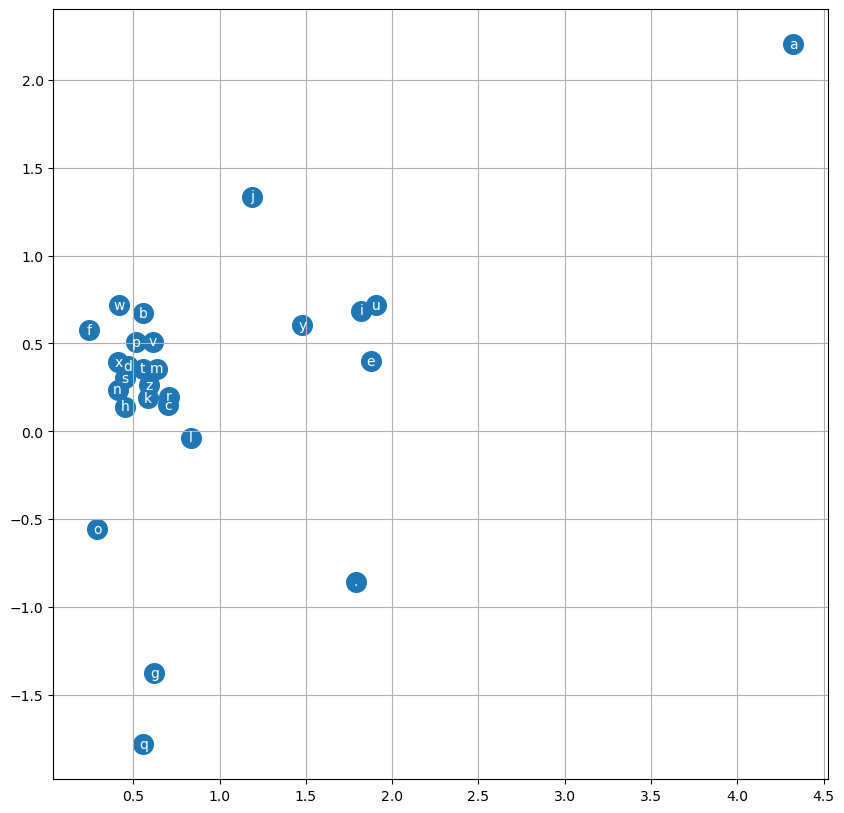

In [398]:
plt.figure(figsize=(10, 10))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range (C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')


In [451]:
g = torch.Generator().manual_seed(2147483647 + 10)

# print(block_size)
for _ in range(10):
    out = []
    context = [0] * block_size
    # print(f'context: {context}')
    while True:
        emb = C[torch.tensor([context])]
        # print(f'emb: {emb}')
        h = emb.view(1, -1)
        # print(f'h.shape: {h.shape}')
        h = h @ W1 + b1
        h = h.tanh()
        logits = h @ W2 + b2
        # print(f'logits: {logits}')
        probs = F.softmax(logits, dim=1)
        # print(f'probs.shape: {probs.shape}')
        # print(probs.shape)
        # print(probs)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

# print(f'emb shape: {emb.shape}')
# print(f'context: {context}')
 

mora.
kayah.
seeven.
hayla.
revers.
endrie.
cailee.
seline.
milopa.
edelisan.
